# Assigment 10 | Applied Machine Learning | Paras Ahuja

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math
from os import listdir
from os.path import isfile, join
from IPython.display import display_markdown
import seaborn as sns
import matplotlib.pyplot as plt
from operator import itemgetter
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import scale
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### In this assignment, we will develop a ML model for cybersecurity intrusion detection. Please visit the website: https://www.unb.ca/cic/datasets/ids-2017.html and look around to see the problem space and the evaluation datasets to be used for ML model development.

### This dataset is collected by cyber experts during experimentation that was carried on for 5 days long. The description of the experiments also inform the experimental ground truth.(Optional: GeneratedLabelledFlows.zip, note that it is already pre-processed by someone)

### 1. Download the labeled dataset, if you like use a dummy email address for registration. There must be 8 data files, each representing a particular cyber-attack type and it's day, and it's collected pcap data.

In [2]:
values = ['data/' + f for f in listdir('data/') if isfile(join('data/', f))]
keys = ["Dataset " + str(i + 1) for i in range(len(values))]
data = dict(zip(keys, values))

In [3]:
def load_datasets(data_dict):
    loaded = dict()
    
    for key, val in data_dict.items():
        data = pd.read_csv(val)
        loaded[key] = data
        
    return loaded

In [4]:
datasets = load_datasets(data)

In [5]:
def show_datasets(datasets):
    for data in datasets:
        display_markdown('### ' + data, raw=True)
        display(datasets[data].head())

In [6]:
show_datasets(datasets)

### Dataset 1

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,166,1,1,0,0,0,0,0.000,0.000,...,32,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN
1,60148,83,1,2,0,0,0,0,0.000,0.000,...,32,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN
2,123,99947,1,1,48,48,48,48,48.000,0.000,...,40,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN
3,123,37017,1,1,48,48,48,48,48.000,0.000,...,32,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN
4,0,111161336,147,0,0,0,0,0,0.000,0.000,...,0,1753752.625,2123197.578,4822992,95,9463032.700,2657727.996,13600000,5700287,BENIGN


### Dataset 2

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.000,0.000,...,20,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.000,0.000,...,20,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.000,0.000,...,20,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.000,0.000,...,20,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.000,0.000,...,20,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN


### Dataset 3

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.500,204.724,...,32,359.429,11.998,380,343,16100000.000,498804.820,16400000,15400000,BENIGN
1,389,112740560,32,16,6448,5056,403,0,201.500,204.724,...,32,320.286,15.745,330,285,16100000.000,498793.666,16400000,15400000,BENIGN
2,0,113757377,545,0,0,0,0,0,0.000,0.000,...,0,9361828.600,7324645.883,18900000,19,12200000.000,6935824.002,20800000,5504997,BENIGN
3,5355,100126,22,0,616,0,28,28,28.000,0.000,...,32,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN
4,0,54760,4,0,0,0,0,0,0.000,0.000,...,0,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN


### Dataset 4

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.976,109.865,...,32,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.976,109.865,...,32,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000,0.000,...,32,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.537,110.130,...,32,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000,0.000,...,32,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN


### Dataset 5

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.000,0.000,...,20,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.000,0.000,...,20,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.000,0.000,...,20,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.000,0.000,...,20,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.000,0.000,...,20,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN


### Dataset 6

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857,107.349,...,20,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN
1,88,900,9,4,600,2944,300,0,66.667,132.288,...,20,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571,677.275,...,20,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN
3,88,511,7,4,452,370,226,0,64.571,110.277,...,20,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000,134.933,...,20,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN


### Dataset 7

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000,0.000,...,20,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636,31.449,...,32,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000,632.562,...,32,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.059,425.778,...,32,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000,694.510,...,32,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN


### Dataset 8

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.417,203.548,...,32,203985.500,575837.256,1629110,379,13800000.000,4277541.062,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.118,171.919,...,32,178326.875,503426.946,1424245,325,13800000.000,4229413.120,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000,0.000,...,0,6909777.333,11700000.000,20400000,6,24400000.000,24300000.000,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.889,409.702,...,20,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000,0.000,...,32,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN


### 2. Pick one of the data files, call it Dataset 1, and examine its features. Make sure it has more than one class value for its label.

We will simply pick Dataset 1 as shown above. 

**Note for simplicity and ease of calling the dataset, I will refer to it as df, but since loaded datasets are stored in a dictionary, we can see that it is indeed Dataset 1 that we are using.**

In [7]:
# Dataset 1
df = datasets['Dataset 1']
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,166,1,1,0,0,0,0,0.000,0.000,...,32,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN
1,60148,83,1,2,0,0,0,0,0.000,0.000,...,32,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN
2,123,99947,1,1,48,48,48,48,48.000,0.000,...,40,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN
3,123,37017,1,1,48,48,48,48,48.000,0.000,...,32,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN
4,0,111161336,147,0,0,0,0,0,0.000,0.000,...,0,1753752.625,2123197.578,4822992,95,9463032.700,2657727.996,13600000,5700287,BENIGN


Let's get some specific information about the dataset, particularly number of rows we are working with here.

In [8]:
df.shape

(288602, 79)

As we can see, there are 288,602 rows. The data has a lot of examples for us to use! For columns we already know that there are 79 columns as we can see from the result of line 7. Also, there are a lot of features that we are working with here. We may have to contend with multicolinearity or the curse of dimensionality. Let's make sure that the dataset indeed has more than one class value for its label.

In [9]:
print("Number of Class Labels: {}".format(len(df[" Label"].unique())))

Number of Class Labels: 2


The dataset indeed has more than one class value for its label. We will rename the Label variable from " Label" to "Label".

In [10]:
df["Label"] = df[" Label"]
df.drop(columns=" Label", inplace=True)
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,166,1,1,0,0,0,0,0.000,0.000,...,32,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN
1,60148,83,1,2,0,0,0,0,0.000,0.000,...,32,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN
2,123,99947,1,1,48,48,48,48,48.000,0.000,...,40,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN
3,123,37017,1,1,48,48,48,48,48.000,0.000,...,32,0.000,0.000,0,0,0.000,0.000,0,0,BENIGN
4,0,111161336,147,0,0,0,0,0,0.000,0.000,...,0,1753752.625,2123197.578,4822992,95,9463032.700,2657727.996,13600000,5700287,BENIGN


Let's find out if we have any missing values in our dataset.

In [11]:
def missing_values(df):
    missing = []
    for feature in df.columns:
        value = df[feature].isna().sum()
        if value > 0:
            missing.append((feature, value))
    if len(missing) == 0:
        return "No missing values in the dataset"
    else:
        return missing

In [12]:
missing = missing_values(df)
missing

[('Flow Bytes/s', 18)]

We notice that 18 values are missing in Flow Bytes/s. We can easily impute these values since we a lot of data, we can use mean of the feature as the value to take place of NaN. Let's describe this feature.

In [13]:
df['Flow Bytes/s'].describe()

count      288584.000
mean              inf
std               nan
min     -12000000.000
25%           845.982
50%         19567.552
75%        340425.532
max               inf
Name: Flow Bytes/s, dtype: float64

So it appears that the numbers are quite large, and mean is inf. To make it easier, we will simply drop the 18 missing rows. We have 288,602 instances of data, we will be fine dropping 18.

In [14]:
df.dropna(axis=0, inplace=True)

Next, we take a look at the correlation heatmap to see how our features correlate.

In [15]:
def drop_no_correlation(df):
    count = 0
    columns_to_drop = []
    corr = df.corr()
    columns = corr.columns
    for column in columns:
        column_length = len(corr[column])
        for i in range(column_length):
            if math.isnan(corr[column][i]) or corr[column][i] == 0:
                count += 1
        if count == column_length:
            columns_to_drop.append(column)
        count = 0
    return df.drop(columns=columns_to_drop)

In [16]:
new_df = drop_no_correlation(df)

In [17]:
def correlation_heatmap(df, size=(15,15)):
    sns.set_theme(style="white")

    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=size)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    g = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

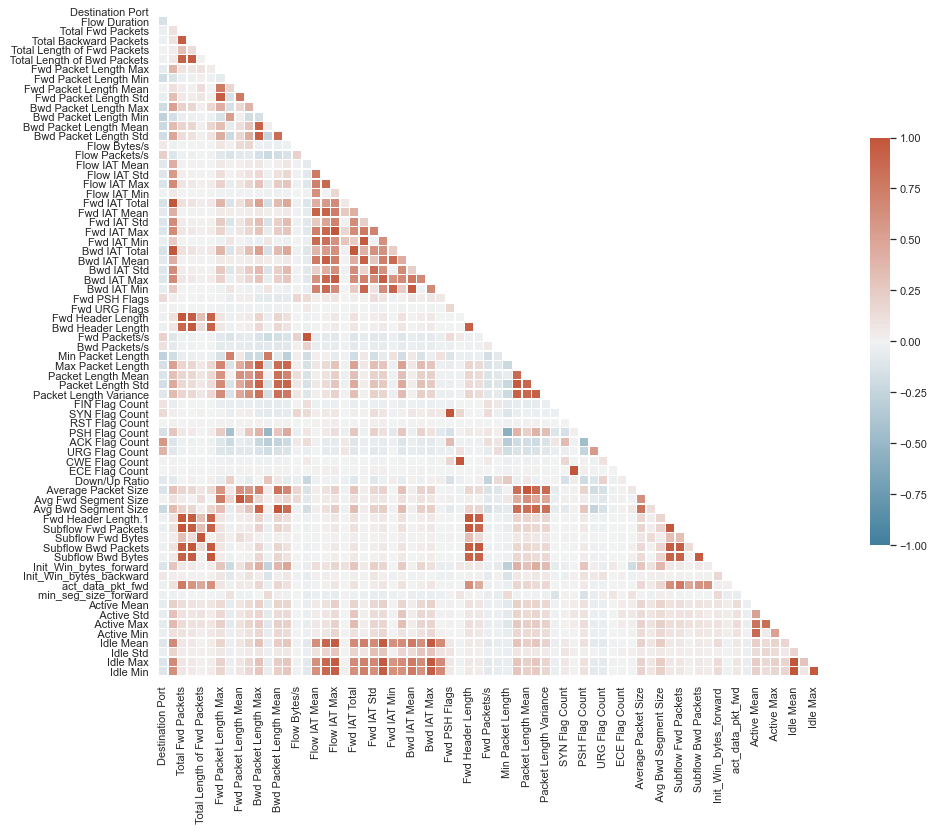

In [18]:
correlation_heatmap(new_df)

**Note: If the heatmap is too small, the function takes in size tuple. I kept it small for demonstration purposes, but it is still quite legible.**

We will now analyze the following features:

    1. Total Backward Packets
    2. Total Length of Fwd Packets
    3. Total Fwd Packets
    
We are picking these features because they appear to have high correlation, as can be seen through the red squares on the heatmap above.

#### Total Backward Packets


This feature represents the total number of packets that were sent in the backwards direction.

In [19]:
df[' Total Backward Packets'].describe()

count   288584.000
mean         6.222
std        111.403
min          0.000
25%          1.000
50%          2.000
75%          2.000
max      44553.000
Name:  Total Backward Packets, dtype: float64

As we can san see the mean of total backward packets is 6.221, however the max value is quite high compared to the mean. Let's plot this information see what we get.

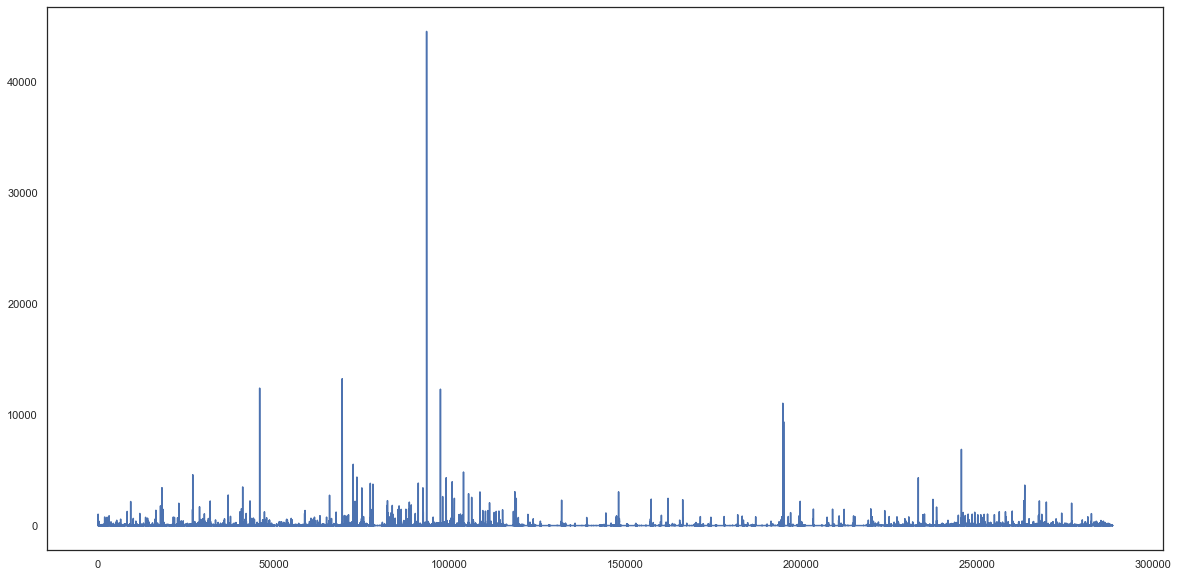

In [20]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(df[' Total Backward Packets'])
plt.show()

So it appears that vast majority of the packets are quite low but we have a few spikes. Notice that most of the spikes are 10000 or higher. Are these spikes infiltrations? Let's find out.

In [21]:
df.loc[df[' Total Backward Packets'] >= 8000]["Label"]

45972     BENIGN
69459     BENIGN
93457     BENIGN
97395     BENIGN
194786    BENIGN
194832    BENIGN
195046    BENIGN
Name: Label, dtype: object

So all of the spikes are Benign. Well, what do the Infiltration spikes look like then? 

In [22]:
df.loc[df['Label'] == "Infiltration"][' Total Backward Packets'].describe()

count     36.000
mean     829.611
std     1502.978
min        0.000
25%       15.000
50%       26.000
75%     1062.500
max     5525.000
Name:  Total Backward Packets, dtype: float64

So the mean of Total Backward Packets when Infiltration is 829.61. Is this higher than Benign? Let's find out.

In [23]:
df.loc[df['Label'] == "BENIGN"][' Total Backward Packets'].describe()

count   288548.000
mean         6.119
std        109.789
min          0.000
25%          1.000
50%          2.000
75%          2.000
max      44553.000
Name:  Total Backward Packets, dtype: float64

So mean of Total Backward Packets when Benign is 6.11, which is definitely a lot lower than Infiltration.

#### Total Length of Fwd Packets


In [24]:
df['Total Length of Fwd Packets'].describe()

count     288584.000
mean         566.252
std        26054.308
min            0.000
25%            4.000
50%           49.000
75%           95.000
max     12900000.000
Name: Total Length of Fwd Packets, dtype: float64

So these appear to be quite large values. But we can plot these and see what they look like. However, before we do that, note again that max value is very large.

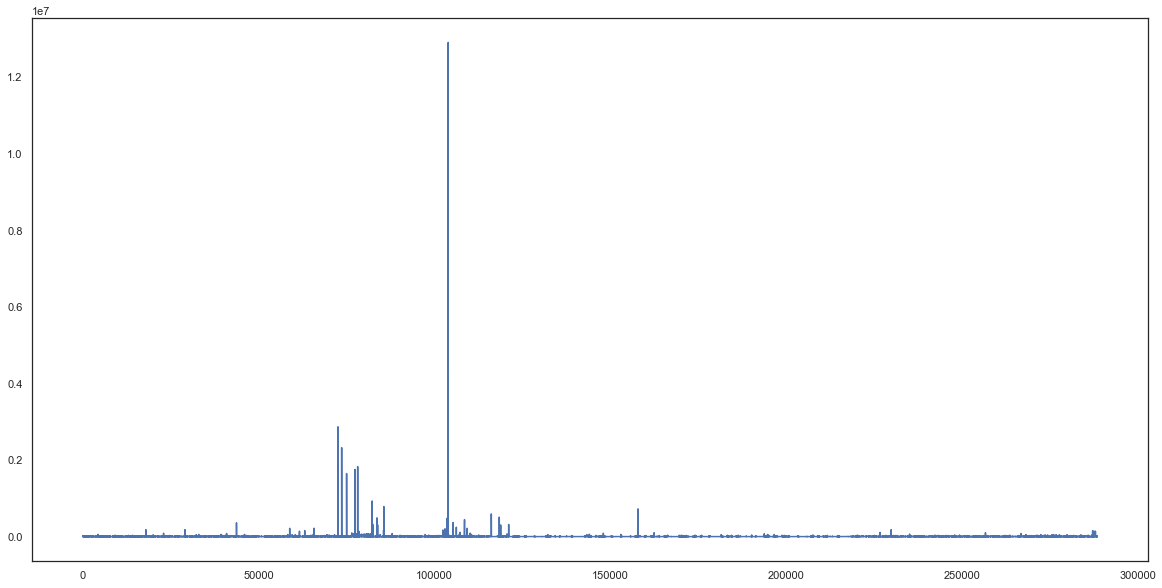

In [25]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(df['Total Length of Fwd Packets'])
plt.show()

So the single spike stands our quite a lot. Let's find out if this was an infiltration attempt.

In [26]:
df.loc[df['Total Length of Fwd Packets'] == 12900000]["Label"]

103957    BENIGN
Name: Label, dtype: object

So this was not an Infiltration attempt. But what does Infiltration look like on this feature.

In [27]:
df.loc[df['Label'] == "Infiltration"]['Total Length of Fwd Packets'].describe()

count        36.000
mean     376725.778
std      747593.249
min           0.000
25%        3737.750
50%        7020.000
75%      310861.750
max     2866110.000
Name: Total Length of Fwd Packets, dtype: float64

What about Benign?

In [28]:
df.loc[df['Label'] == "BENIGN"]['Total Length of Fwd Packets'].describe()

count     288548.000
mean         519.321
std        24361.104
min            0.000
25%            4.000
50%           49.000
75%           95.000
max     12900000.000
Name: Total Length of Fwd Packets, dtype: float64

So the mean of Benign is higher than infiltration. If on average we see Total Length of Fwd Packets less than 5.19, we should err on the side of caution and understand that this may be a n infiltration attempt.

#### Total Fwd Packets

In [29]:
df[' Total Fwd Packets'].describe()

count   288584.000
mean         6.230
std         74.590
min          1.000
25%          2.000
50%          2.000
75%          3.000
max      22673.000
Name:  Total Fwd Packets, dtype: float64

We see that we have a mean of 6.230 and the maximum value is 22673.

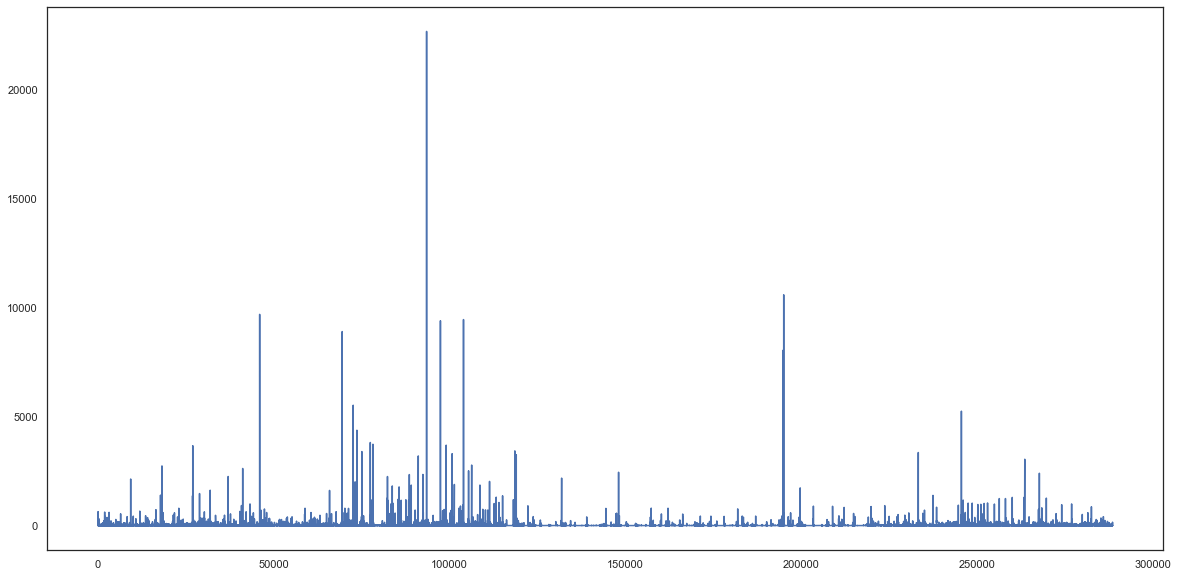

In [30]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(df[' Total Fwd Packets'])
plt.show()

So there are a lot of spikes here, more so than other graphs above. Let's find out what the spikes above 8000 mean.

In [31]:
df.loc[df[' Total Fwd Packets'] >= 8000]["Label"]

45972     BENIGN
69459     BENIGN
93457     BENIGN
97395     BENIGN
103957    BENIGN
194786    BENIGN
195046    BENIGN
Name: Label, dtype: object

So all the spikes are BENIGN.

In [32]:
df.loc[df['Label'] == "Infiltration"][' Total Fwd Packets'].describe()

count     36.000
mean     830.222
std     1502.961
min        2.000
25%       15.000
50%       26.000
75%     1062.500
max     5523.000
Name:  Total Fwd Packets, dtype: float64

So the mean is 830.22 if we are experiencing infiltration. If we were to guess or hypothesize, BENIGN will be much lower mean and the reason is that Total Bwd Packets provided similar results.

In [33]:
df.loc[df['Label'] == "BENIGN"][' Total Fwd Packets'].describe()

count   288548.000
mean         6.127
std         72.150
min          1.000
25%          2.000
50%          2.000
75%          3.000
max      22673.000
Name:  Total Fwd Packets, dtype: float64

So our guess was correct. We notice here that mean is much lower for Benign than it is for Infiltration.

This completes our initial examination of the three variables of our choice. We obtained the following insights:

      1. Mean of Total Bwd Packets and Total Fwd Packets when infiltration is a lot higher than under normal scenario.
      2. Total Length of Fwd Packets mean is higher when Benign. This leads us to believe that shorter total length of fwd packets is associated with an infiltration attempt.

### 3. For the Dataset 1, pick a machine learning methodology and justify your choice.

Because have a class label present, and the class label is nominal, we can use Supervised Learning on the dataset and train the dataset to learn what infiltration looks like, and the predict on an unseen dataset if there is an infiltration attempt or not. Also of interest is obtain probability of an event. If we have a 90% probability that an attempt is infiltration we should be concerned. Furthermore, in defense we have to be right at every moment otherwise we could risk losing critical information or allowing malicious actor to corrupt our database or infrastructure. Therefore, high level of accuracy is needed here. We will test a few classifiers and proceed with the one that provides highest level of accuracy.

### 4. Process the class feature/category as binary classes for supervised learning, assign BENIGN to value 0 and the rest to value 1. Check its balance for the Dataset 1.

In [34]:
df.Label.unique()

array(['BENIGN', 'Infiltration'], dtype=object)

There are only two class labels here. We will treat BENIGN as 0 and Infiltration as 1.

In [35]:
df.replace({"BENIGN": 0, "Infiltration": 1}, inplace=True)

In [36]:
df.loc[df.Label == 0]["Label"].count()

288548

Vast majority of the data is labeled as benign. We must have only a few istances of Infiltration.

In [37]:
df.loc[df.Label == 1]["Label"].count()

36

This makes sense, realitically speaking not everyone is trying to infiltrate a server or act maliciously, and not everyone gets through. Its the small number of actors that try such an activity, and cause damage when they get through. Even in our dataset infiltration only makes up 0.01% of the entire data.

### 5. Explore Dataset 1 features with respect to the class. (Hint: features Source Port and Destination Port are very useful, research and find out important networking port numbers and one-hot-encode them. Unimportant port numbers or source port numbers can be assigned to a feature called 'other ports')

In [38]:
len(df[' Destination Port'].unique())

24686

There are 24686 unique Destination ports. Destination ports may be "well-known ports" (0-1023) for the major Internet applications, such as Web and email. For example, all port 80 packets (HTTP packets) are directed to and processed by a Web server. User "registered ports" (1024-49151) are assigned to applications that are mostly vendor specific, such as Skype and BitTorrent.

The source port is a next-available number assigned by TCP/IP to the user's machine. This assigned client number is how the network address translation (NAT), which typically resides in the router, determines which user to send back the responses to. Although that same client number is used simultaneously within thousands of organizations, each TCP/IP network keeps track (via NAT) of its own assigned numbers for internal use only. A "socket" is the combination of port number and IP address (see Unix socket). See NAT.

TCP connects from a source port to a destination port, such as from source port 51178 to destination port 22. The TCP port field is 16 bits, allowing port numbers from 0 to 65535.

There are two types of ports: reserved and ephemeral. A reserved port is 1023 or lower; ephemeral ports are 1024-65535. Most operating systems require super-user privileges to open a reserved port. Any user may open an (unused) ephemeral port.

Research suggests that most important port numbers are:

1. Port 20: FTP data transfer - someone can infiltrate and find out what is being transfer FTP is not secure by default since it is not encrypted. SFTP is much safer.
2. Port 22: SSH, SFTP - secure logins, port forwarding. SFTP uses port 22, but the connection is generally encrypted so the ISPs or others know that files are being transfered but not what is being transfered.
3. Port 80: HTTP - one of the most important ports out there. Accessing any website will lead us to this port number. We can expect a higher number of port 80. 

Next we find out the number of instances of these ports. We will treat port 20, 22, 80 as ports of importance and all the ports will get encoded as other ports.

References:

1. https://en.wikipedia.org/wiki/List_of_TCP_and_UDP_port_numbers
2. https://en.wikipedia.org/wiki/Port_(computer_networking)
3. https://www.sciencedirect.com/topics/computer-science/destination-port
4. https://www.pcmag.com/encyclopedia/term/tcpip-port

In [39]:
print("Number of Port 20 Instances: {}\nNumber of Port 22 Instances: {}\nNumber of Port 80 Instances: {}".format(df.loc[df[' Destination Port'] == 20].count()[0], 
                                                                                                                 df.loc[df[' Destination Port'] == 22].count()[0],
                                                                                                                 df.loc[df[' Destination Port'] == 80].count()[0]))

Number of Port 20 Instances: 61
Number of Port 22 Instances: 1311
Number of Port 80 Instances: 25833


This is rather interesting. We were expecting to see a lot higher number for port 80, but it only makes up roughly 8% of our data. We should find out the percentages of ports, and find out which one is being used most often, or is there one that is being used most often.

In [40]:
def port_percentages(df):
    percentages = []
    total_instances = df.shape[0]
    ports = df[' Destination Port'].unique()
    num_unique_ports = len(ports)
    for i in range(num_unique_ports):
        num_port_instances = df.loc[df[' Destination Port'] == ports[i]].count()[0]
        percentage = round((num_port_instances / total_instances) * 100, 2)
        percentages.append((ports[i], num_port_instances, percentage))
    return percentages

In [41]:
percentages = port_percentages(df)
percentages.sort(key=itemgetter(2),reverse=True)
percentages[0:5]

[(53, 99311, 34.41),
 (443, 51766, 17.94),
 (80, 25833, 8.95),
 (22, 1311, 0.45),
 (123, 954, 0.33)]

Above we notice that Destination port has the highest number of instances. We have 99311 instances, which makes up to be 34.41% of the dataset. What is port 53 anyway? Research shows that port 53 is DNS. The Domain Name System (DNS) is a hierarchical and decentralized naming system for computers, services, or other resources connected to the Internet or a private network. Second most common port is 443. Research shows that this is another port for HTTP. So when we access websites, we are either passing through port 80 or port 443 the end purpose is the same. 

We should revise our earlier assessment of the port importance. It appears that port 53, 443, 80, 22, and 123 are of utmost importance, while we can group other ports as others. 

Let's check how these ports affect the class labels.

In [42]:
def infiltrated_ports(df, percentages):
    infiltrated_ports = []
    for i in range(len(percentages)):
        port = percentages[i][0]
        count = df.loc[(df[' Destination Port'] == port) & (df.Label == 1)].count()[0]
        if count > 0:
            infiltrated_ports.append((port, count))
    return infiltrated_ports

In [43]:
infiltration = infiltrated_ports(df, percentages)
infiltration

[(444, 36)]

All of the 36 infiltrations happend at port 444. Research suggests that port 444 is simple Network Paging Protocol (SNPP). SNPP protocol defines a method by which a pager can receive a message over the Internet. It is supported by most major paging providers, and serves as an alternative to the paging modems used by many telecommunications services. It is relatively easy to connect to a SNPP server only requiring a telnet client and the address of the SNPP server. The port 444 is standard for SNPP servers, and it is free to use from the sender's point of view.

We again modify our list of ports. We will use port 53, 443, 80, 22, 123, and 444. The reason for change is that we do not want to group amongst others because all of the infiltrations happened here. 

Reference: 

https://en.wikipedia.org/wiki/Simple_Network_Paging_Protocol


In [44]:
def port_check(x, ports=[53, 443, 80, 22, 123, 444]):
    return True if x in ports else False

df_copy = df.copy()
df_copy[' Destination Port'] = df_copy[' Destination Port'].apply(lambda x: x if port_check(x) else "other")

In [45]:
ohe = pd.get_dummies(df_copy)
ohe.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Idle Max,Idle Min,Label,Destination Port_22,Destination Port_53,Destination Port_80,Destination Port_123,Destination Port_443,Destination Port_444,Destination Port_other
0,166,1,1,0,0,0,0,0.000,0.000,0,...,0,0,0,1,0,0,0,0,0,0
1,83,1,2,0,0,0,0,0.000,0.000,0,...,0,0,0,0,0,0,0,0,0,1
2,99947,1,1,48,48,48,48,48.000,0.000,48,...,0,0,0,0,0,0,1,0,0,0
3,37017,1,1,48,48,48,48,48.000,0.000,48,...,0,0,0,0,0,0,1,0,0,0
4,111161336,147,0,0,0,0,0,0.000,0.000,0,...,13600000,5700287,0,0,0,0,0,0,0,1


We have now one hot encoded our data.

### 6. Display some histograms and anything you deem fit to pick independent Dataset 1 features. (Hint: source/destination bytes, packets, ports and the duration features)

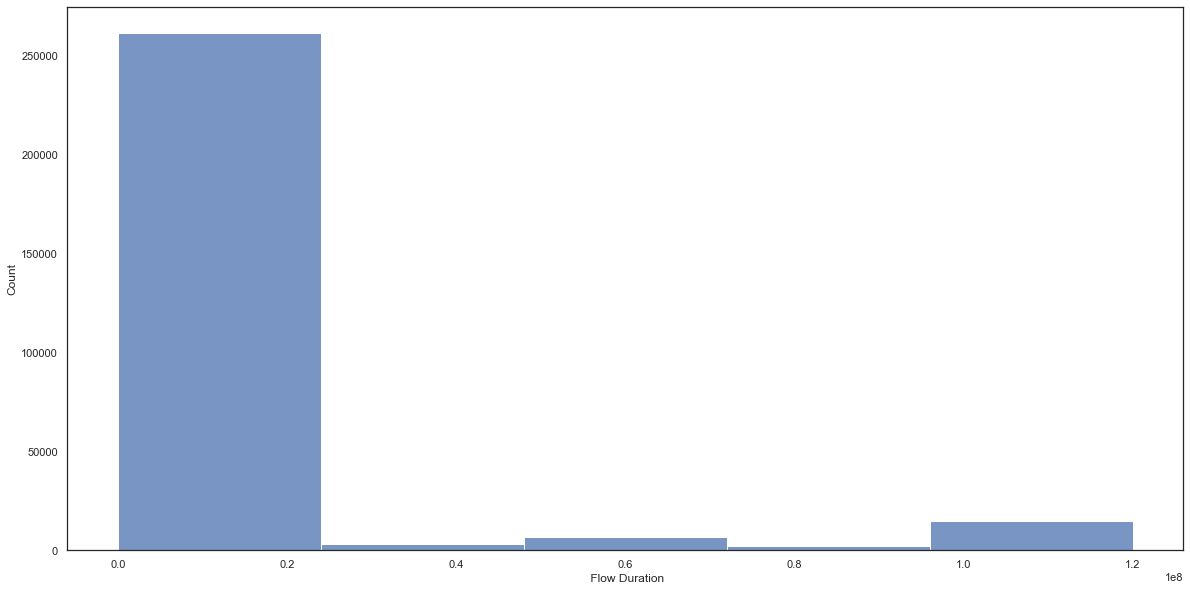

In [46]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.histplot(df[' Flow Duration'], bins=5)
plt.show()

We notice that vast majority of flow duration is between 0 to 0.2, but note that the numbers are $1e8$ or $10^8$. Let's see if the flow duration of infiltration is larger than the rest.

In [47]:
df.loc[df.Label == 1][' Flow Duration'].describe()

count          36.000
mean     78407720.500
std      40396638.482
min            20.000
25%      54516598.250
50%      93188869.000
75%     116775756.250
max     119995180.000
Name:  Flow Duration, dtype: float64

So we can say that Infiltration flow duration generally falls between 0.6 - 0.8 in the histogram above. 

### 7. Attempt a few classifier models and report their 10-fold CV performance.

In [48]:
ohe.reset_index(drop=True, inplace=True)
index = ohe.index[np.isinf(ohe).any(1)]
ohe.drop(index=index, inplace=True)
y = np.array(ohe.Label)
X = np.array(ohe[[column for column in ohe.columns if column != "Label"]])

In [49]:
def kfold(clf, X, y, splits=10, shuffle=True, random_state=10):
    score_acc = []
    score_f1 = []
    kfold = StratifiedKFold(n_splits=splits, shuffle=shuffle, random_state=random_state)
    for train_index, test_index in kfold.split(X, y):
        clfr = clf.fit(X[train_index], y[train_index])
        y_pred = clfr.predict(X[test_index])
        score_f1 += [f1_score(y[test_index], y_pred, average='micro')]
        score_acc += [accuracy_score(y[test_index], y_pred)]
    return np.mean(np.array(score_f1)), np.mean(np.array(score_acc))

In [50]:
clf = LinearDiscriminantAnalysis()
f1, accuracy = kfold(clf, X, y)
print("F1 Score: {}".format(str(f1 * 100) + "%"))
print("Accuracy Score: {}".format(str(accuracy * 100) + "%"))

F1 Score: 99.96567197948494%
Accuracy Score: 99.96567197948494%


In [51]:
clf = RandomForestClassifier(max_depth=2)
f1, accuracy = kfold(clf, X, y)
print("F1 Score: {}".format(str(f1 * 100) + "%"))
print("Accuracy Score: {}".format(str(accuracy * 100) + "%"))

F1 Score: 99.98925087189538%
Accuracy Score: 99.98925087189538%


In [52]:
clf = DecisionTreeClassifier()
f1, accuracy = kfold(clf, X, y)
print("F1 Score: {}".format(str(f1 * 100) + "%"))
print("Accuracy Score: {}".format(str(accuracy * 100) + "%"))

F1 Score: 99.998613037448%
Accuracy Score: 99.998613037448%


We notice that DecisionTreeClassifier has the highest F1 score and accuracy. We should go with DecisionTreeClassifier. Second reason is the fact that we have 288395 instances in our one hot encoded data, and we know that there are only 36 instances of infiltration. So BENIGN makes up to be about 99.9875% of the data. We need to perform better than this number, and only DecisionTreeClassifier provides higher accuracy than other two.

### 8. Convert your code to be used for the remaining 7 datasets, i.e. Datasets 2-8. 

In [53]:
# df2 is unsupervised learning problem
df2 = datasets['Dataset 2']

# supervised learning problems
df3 = datasets['Dataset 3']
df4 = datasets['Dataset 4']
df5 = datasets['Dataset 5']
df6 = datasets['Dataset 6']
df7 = datasets['Dataset 7']
df8 = datasets['Dataset 8']
df_list = [df3, df4, df5, df6, df7, df8]

In [54]:
# Step 1: Drop missing features
def dropna(df_list):
    frame_list = []
    for df in df_list:
        df = df.dropna(axis=0)
        frame_list.append(df)
    return frame_list

In [55]:
df_list = dropna(df_list)

In [56]:
# Step 2: Change the name of the Label feature to remove extra space
def change_name(df_list):
    frame_list = []
    for df in df_list:
        df = df.rename(columns={" Label": "Label"})
        frame_list.append(df)
    return frame_list

In [57]:
df_list = change_name(df_list)

In [58]:
# Step 3: Binarize class labels
def binarize(df_list):
    for df in df_list:
        df["Label"] = df["Label"].apply(lambda x: 0 if "BENIGN" else 1)
    return df_list

In [59]:
df_list = binarize(df_list)

In [60]:
# Step 4: Calculate port percentages and create columns
def create_columns(df_list):
    df_copy_list = []
    for df in df_list:
        percentages = port_percentages(df)
        infiltration = infiltrated_ports(df, percentages)
        percentages.sort(key=itemgetter(2),reverse=True)
        top = percentages[0:5]
        for i in range(len(infiltration)):
            if infiltration[i][0] not in top:
                top.append(infiltration[i][0])
        df_copy = df.copy()
        df_copy[' Destination Port'] = df_copy[' Destination Port'].apply(lambda x: x if port_check(x, top) else "other")
        df_copy_list.append(df_copy)
    return df_copy_list

In [61]:
df_list = create_columns(df_list)

In [62]:
# Step 5: one hot encode the datasets
def create_ohe(df_list):
    ohe_list = []
    for df in df_list:
        ohe = pd.get_dummies(df)
        ohe_list.append(ohe)
    return ohe_list

In [63]:
ohe_list = create_ohe(df_list)

In [64]:
# Step 6: Separate X and y
def create_x_and_y(ohe_list):
    data = []
    for ohe in ohe_list:
        ohe.reset_index(drop=True, inplace=True)
        index = ohe.index[np.isinf(ohe).any(1)]
        ohe.drop(index=index, inplace=True)
        y = np.array(ohe.Label)
        X = np.array(ohe[[column for column in ohe.columns if column != "Label"]])
        data.append((X, y))
    return data

In [65]:
data = create_x_and_y(ohe_list)

### 9. Pick a classifier and report it's evaluation for the remaining 7 datasets. Note that one dataset has a single class, which might need an unsupervised learning.

In [66]:
def supervised_learning(data):
    clf = DecisionTreeClassifier()
    score = []
    count = 3
    for dataset in data:
        f1, accuracy = kfold(clf, X, y)
        score.append((f1, accuracy, "Dataset " + str(count)))
        count += 1
    return score

In [67]:
scores = supervised_learning(data)

In [68]:
def print_results(scores):
    for score in scores:
        print(score[2] + " F1 Score: {}".format(str(round(score[0] * 100, 4)) + "%"))
        print(score[2] + " Accuracy Score: {}".format(str(round(score[1] * 100, 4)) + "%"))

In [69]:
print_results(scores)

Dataset 3 F1 Score: 99.9983%
Dataset 3 Accuracy Score: 99.9983%
Dataset 4 F1 Score: 99.999%
Dataset 4 Accuracy Score: 99.999%
Dataset 5 F1 Score: 99.9986%
Dataset 5 Accuracy Score: 99.9986%
Dataset 6 F1 Score: 99.9993%
Dataset 6 Accuracy Score: 99.9993%
Dataset 7 F1 Score: 99.999%
Dataset 7 Accuracy Score: 99.999%
Dataset 8 F1 Score: 99.999%
Dataset 8 Accuracy Score: 99.999%


We have obtained high accuracy on our datasets. We now tackle the unsupervised learning data. We need to come up with a technique here because the dimensionality of the data is too high. Furthermore, we need to be able to visualize the data. So here the plan is to utilize PCA to reduce dimensionality, and then use K-means clustering.

In [70]:
df2[" Label"] = df2[" Label"].apply(lambda x: 0 if "BENIGN" else 1)
df2.dropna(inplace=True)
df2.reset_index(drop=True, inplace=True)
index = df2.index[np.isinf(df2).any(1)]
df2.drop(index=index, inplace=True)
X = np.array(df2.copy())

In [71]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

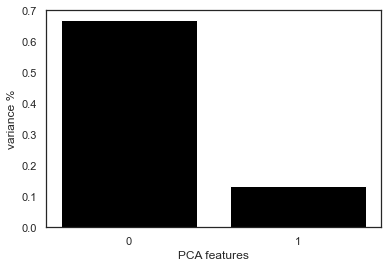

In [72]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

In [73]:
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

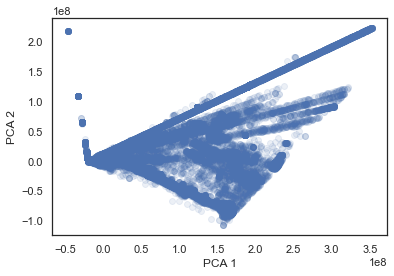

In [74]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

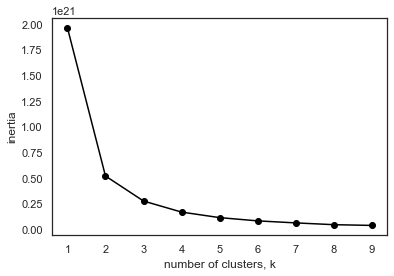

In [75]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

We will use 3 clusters for our k-means clustering.

In [76]:
X = np.array(PCA_components.copy())

In [77]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

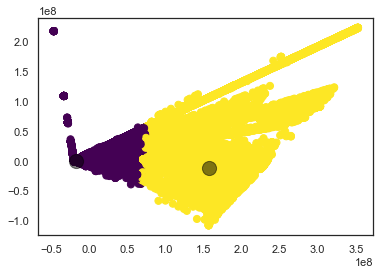

In [78]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

It looks like we can create class labels from these clusters.

**Note: I tried many approaches for unsupervised learning but could not get the code to work beyond this point. What I was trying to do was create class labels based on boundary as we did in Assignment 8. For some reason the same code did not work here. I also found issues with separating the data here because of how the number of instances are clustered.**

### 10. Briefly write up your thoughts about developing a machine learning model where you are not a subject matter expert, such as, developing a cybersecurity intrusion detection pipeline as in this assignment.

I know that when dealing with domain where I do not have knowledge, what has served me well is to first think of the questions that we want to answer, and research the domain with the questions in mind in order to obtain adequate domain knowledge. As data scients or machine learning engineers, we do not always have the domain knowledge, and must research the area. Furthermore, consulting domain experts is also beneficial because they maybe able to provide situation on the ground, and clarify expectations. Overall I found the assignment challenging because at times I had hard time getting the domain knowledge. Furthermore, I was only able to obtain enough domain knowledge that allowed me to work the problem. Other thing that also made it a challenging assignment is the amount of data. This proved to be computationally expensive even on a new machine. As far as learning is concerned, I certainly learned a lot! I read the Scikit-learn manual on PCA and used that and found out that it is actually a commonly used technique.